### **Libraries used**

In [1]:
# importing the libraries required

# importing processing and visualising libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

# importing the libraries required for model and evaluation metrics 
from sklearn.linear_model import LinearRegression   # Linear regression
from sklearn.svm import SVR   # Support vector regression
from sklearn.ensemble import RandomForestRegressor   # Random forest regression
from sklearn import metrics

### **Processing the data**

In [2]:
# Loading the data and initialising the scores dictionary for storing the various errors

data = pd.read_csv('Earthquake_data.csv')
data.drop(['Unnamed: 0', 'Date(YYYY/MM/DD)','Time(UTC)', 'RMS', 'SRC', 'EventID'], inplace=True, axis=1)
scores= {"Model name" : ["Linear regression", "SVM", "Random Forest"], "MSE" : [], "RMSE" : [], "R2 score" : []}
data.head()

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close
0,35.9463,-120.4700,12.26,3.2,Mx,7,171,20
1,35.7867,-120.3265,8.99,3.7,Mx,8,86,3
2,35.7928,-120.3353,9.88,3.4,Mx,8,89,2
3,35.7970,-120.3282,9.09,3.1,Mx,8,101,3
4,35.9223,-120.4585,7.86,3.1,Mx,9,161,14


In [3]:
# Label encoding for the ordinal data 'Magnitude type'

encoder = preprocessing.LabelEncoder()
data['Magnitude_type'] = encoder.fit_transform(data['Magnitude_type']) 
data.head()

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close
0,35.9463,-120.4700,12.26,3.2,3,7,171,20
1,35.7867,-120.3265,8.99,3.7,3,8,86,3
2,35.7928,-120.3353,9.88,3.4,3,8,89,2
3,35.7970,-120.3282,9.09,3.1,3,8,101,3
4,35.9223,-120.4585,7.86,3.1,3,9,161,14


In [4]:
# seperating into dependent and independent variables 

x = data.drop('Magnitude(ergs)', axis = 1)   # Dependent variable
y = data['Magnitude(ergs)']   # Independent variable        

In [5]:
# seperating into train and test data

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, random_state=0)

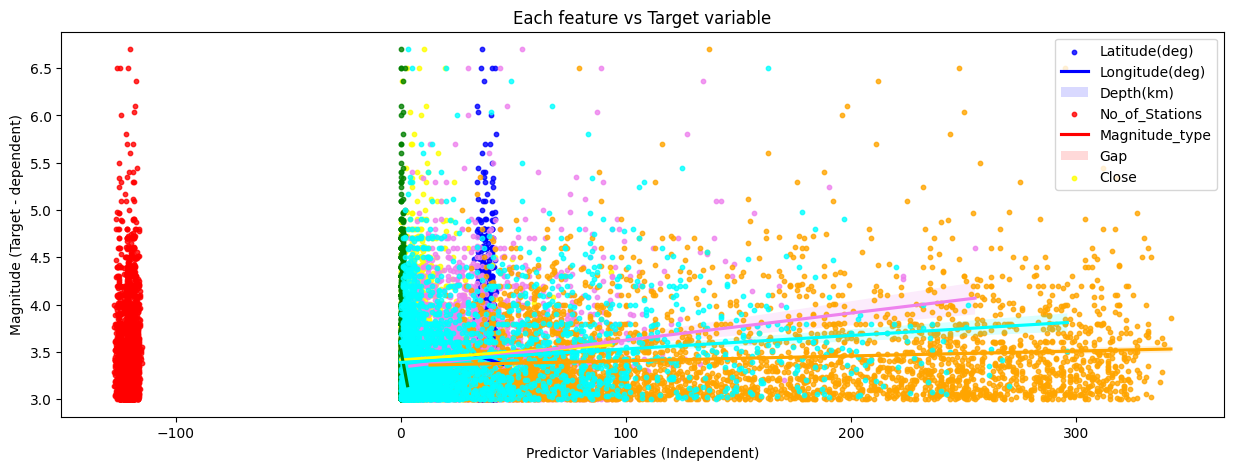

In [6]:
# Scatter plot of target variable with respect to each variable

plt.figure(figsize=(15,5))
sns.regplot(x=xtest['Latitude(deg)'], y=ytest, color='blue', scatter_kws={'s': 10})
sns.regplot(x=xtest['Longitude(deg)'], y=ytest, color='red', scatter_kws={'s': 10})
sns.regplot(x=xtest['Depth(km)'], y=ytest, color='yellow', scatter_kws={'s': 10})
sns.regplot(x=xtest['No_of_Stations'], y=ytest, color='violet', scatter_kws={'s': 10})
sns.regplot(x=xtest['Magnitude_type'], y=ytest, color='green', scatter_kws={'s': 10})
sns.regplot(x=xtest['Gap'], y=ytest, color='orange', scatter_kws={'s': 10})
sns.regplot(x=xtest['Close'], y=ytest, color='cyan', scatter_kws={'s': 10})

label = ['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations', 'Magnitude_type', 'Gap', 'Close']
plt.legend(labels=label)
plt.xlabel('Predictor Variables (Independent)')
plt.ylabel('Magnitude (Target - dependent)')
plt.title('Each feature vs Target variable')
plt.show()

### **Multiple Linear Regression**

In [7]:
# Loading the model and training it 

model_1 = LinearRegression()
model_1.fit(xtrain, ytrain)

LinearRegression()

Mean squared error : 0.1774062325429531
Root mean squared error : 0.42119619246018014
R-squared error : 0.07825363041213396


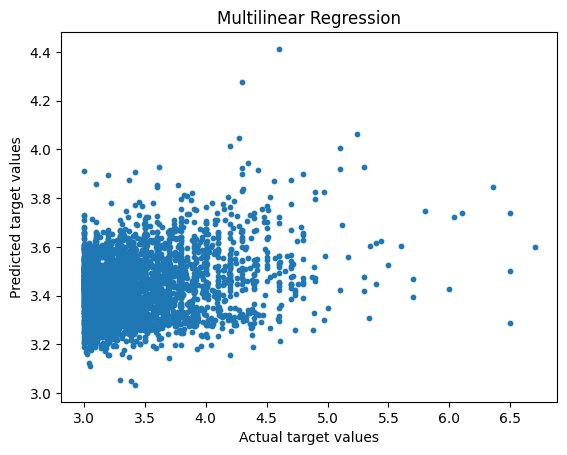

In [8]:
# Testing the model 

ypred_1 = model_1.predict(xtest)
mse_1 = metrics.mean_squared_error(ytest, ypred_1)
rmse_1 = metrics.root_mean_squared_error(ytest, ypred_1)
r2_1 = metrics.r2_score(ytest, ypred_1)

print("Mean squared error :",mse_1)
print("Root mean squared error :",rmse_1)
print("R-squared error :",r2_1)

# Plotting the actual vs predicted values
plt.figure()
plt.scatter(ytest, ypred_1, s=10)
plt.xlabel("Actual target values")
plt.ylabel("Predicted target values")
plt.title('Multilinear Regression')

# Updating the scores
scores['MSE'].append(mse_1)
scores['RMSE'].append(rmse_1)
scores['R2 score'].append(r2_1)

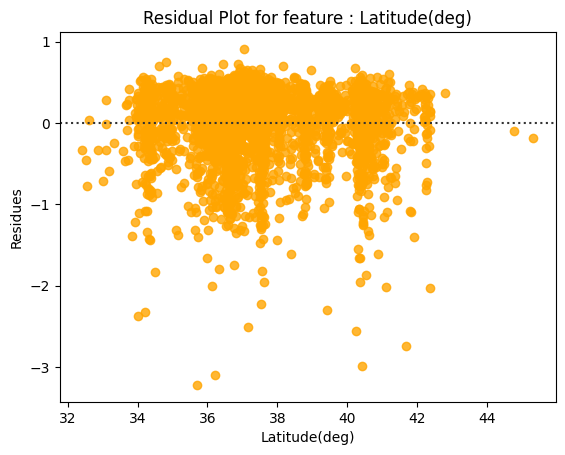

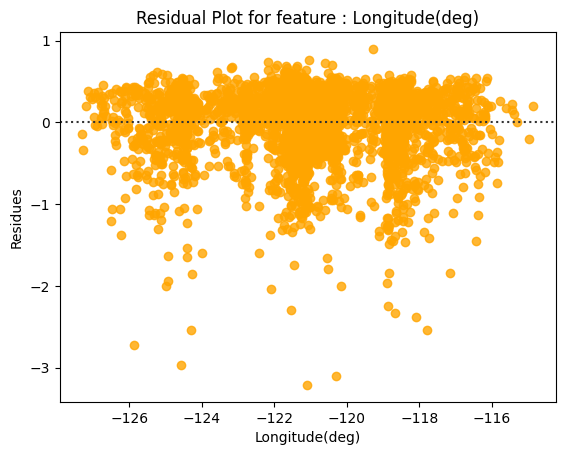

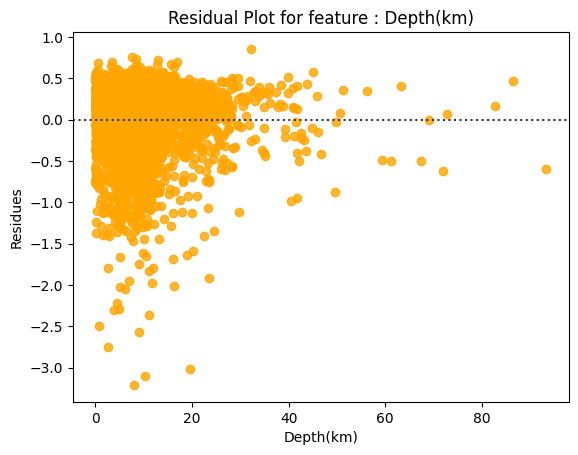

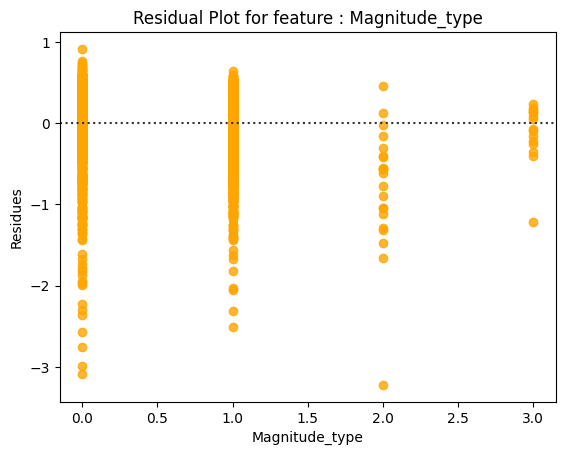

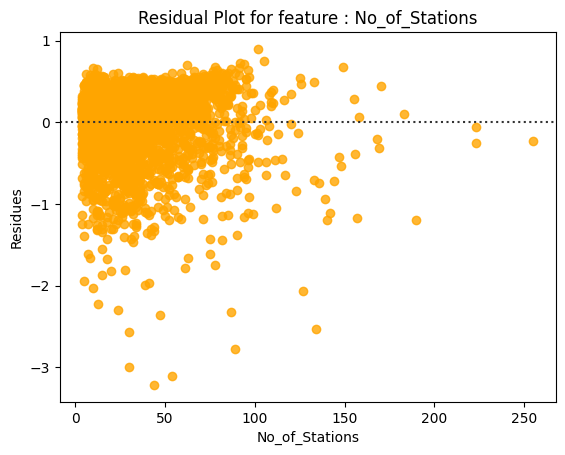

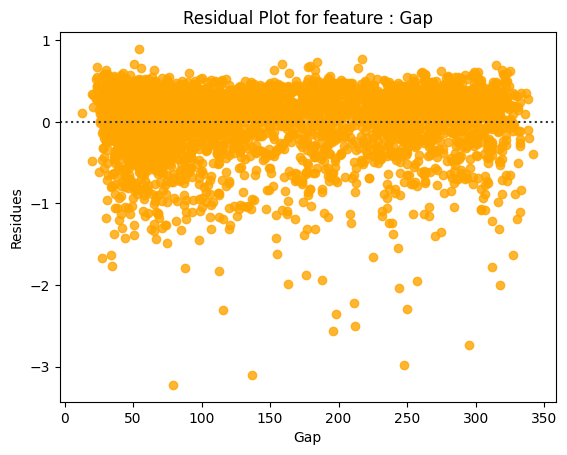

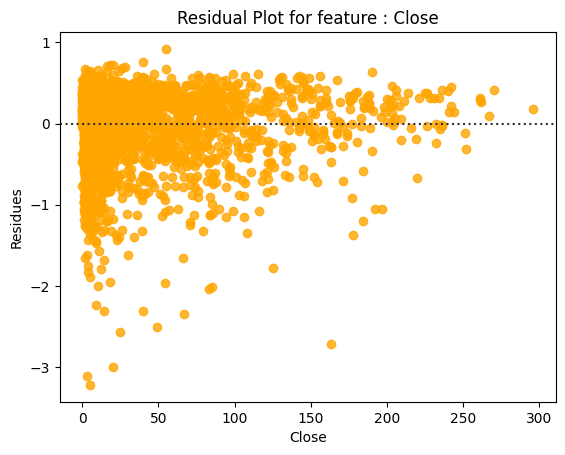

In [9]:
# Residual plot for each feature to understand the correlation of each feature with the tarrget variable 

for i in xtrain.columns:
    plt.figure()
    sns.residplot(x= xtest[i], y =ypred_1-ytest, color='orange')
    plt.xlabel(i)
    plt.ylabel('Residues')
    plt.title('Residual Plot for feature : '+i)
    plt.show()

### **Support Vector Regression**

In [10]:
# Loading the model and training it 

model_2 = SVR()
model_2.fit(xtrain, ytrain)

SVR()

Mean squared error : 0.18178012403298552
Root mean squared error : 0.42635680366681794
R-squared error : 0.05552828111566821


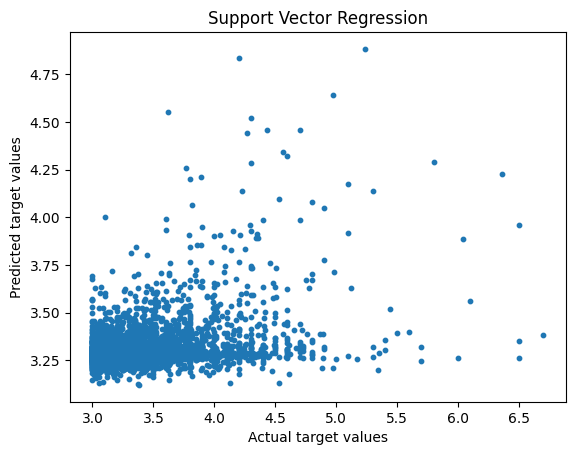

In [11]:
# Testing the model 

ypred_2 = model_2.predict(xtest)
mse_2 = metrics.mean_squared_error(ytest, ypred_2)
rmse_2 = metrics.root_mean_squared_error(ytest, ypred_2)
r2_2 = metrics.r2_score(ytest, ypred_2)

print("Mean squared error :",mse_2)
print("Root mean squared error :",rmse_2)
print("R-squared error :",r2_2)

# Plotting the actual vs predicted values
plt.figure()
plt.scatter(ytest, ypred_2, s=10)
plt.xlabel("Actual target values")
plt.ylabel("Predicted target values")
plt.title('Support Vector Regression')

# Updating the scores
scores['MSE'].append(mse_2)
scores['RMSE'].append(rmse_2)
scores['R2 score'].append(r2_2)

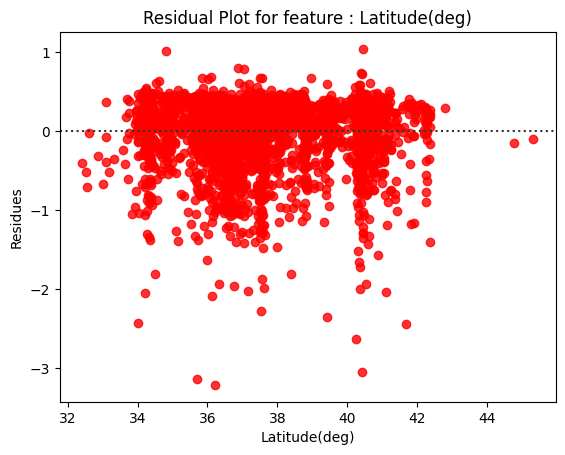

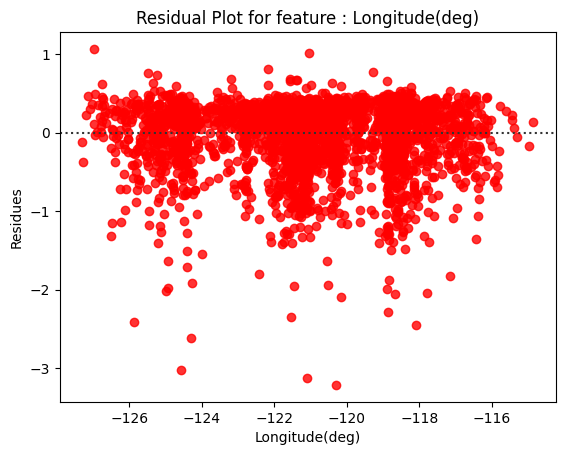

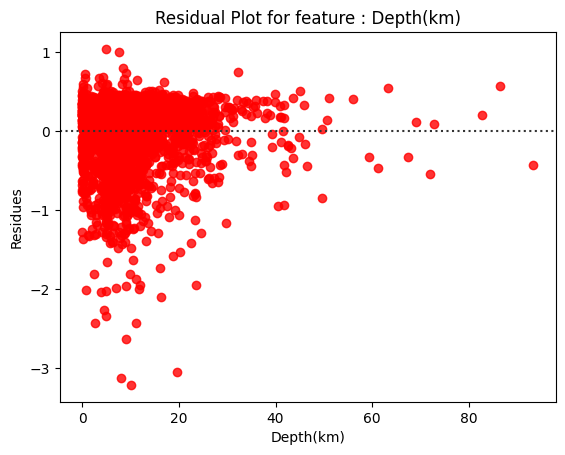

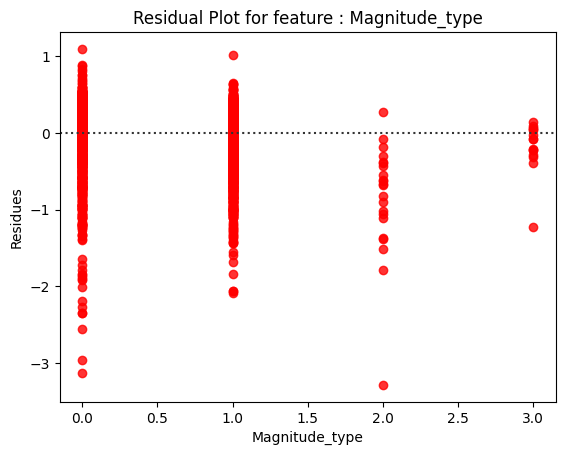

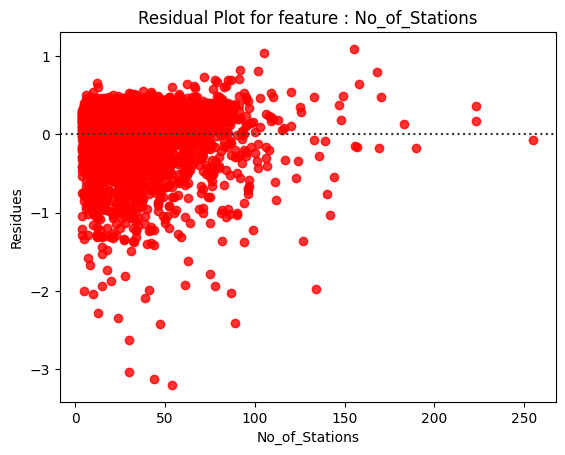

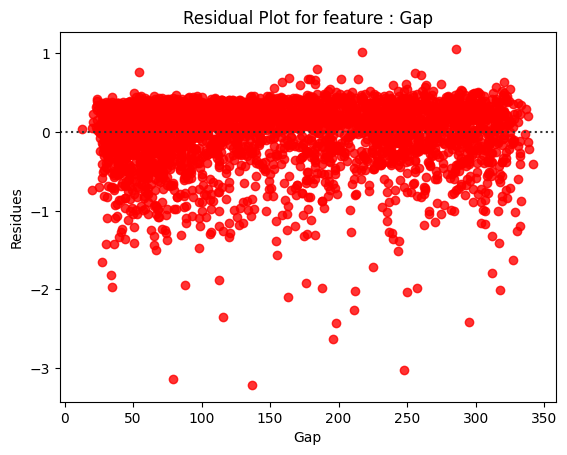

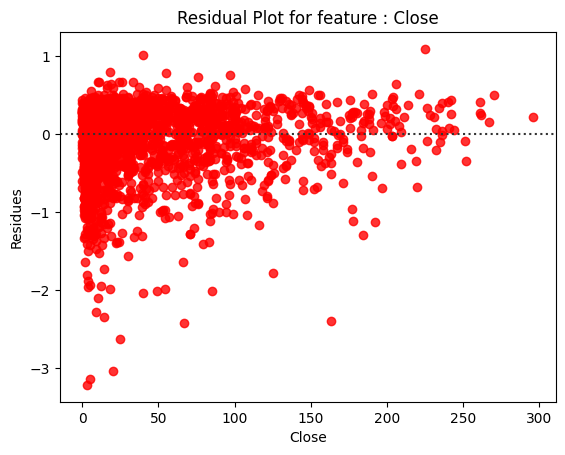

In [12]:
# Residual plot for each feature to understand the correlation of each feature with the tarrget variable 

for i in xtrain.columns:
    plt.figure()
    sns.residplot(x= xtest[i], y =ypred_2-ytest, color='red')
    plt.xlabel(i)
    plt.ylabel('Residues')
    plt.title('Residual Plot for feature : '+i)
    plt.show()

### **Rnadom Forest Regression**

In [13]:
# Loading the model and training it 

model_3 = RandomForestRegressor(n_estimators=156, random_state=0)
model_3.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=156, random_state=0)

Mean squared error : 0.13755914346723971
Root mean squared error : 0.37088966481588526
R-squared error : 0.28528643398227016


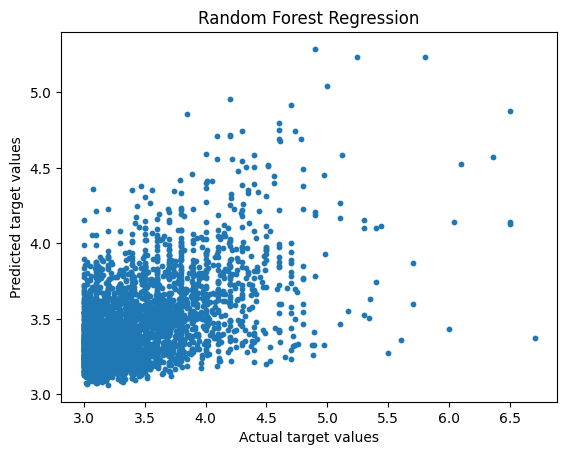

In [14]:
# Testing the model 

ypred_3 = model_3.predict(xtest)
mse_3 = metrics.mean_squared_error(ytest, ypred_3)
rmse_3 = metrics.root_mean_squared_error(ytest, ypred_3)
r2_3 = metrics.r2_score(ytest, ypred_3)

print("Mean squared error :",mse_3)
print("Root mean squared error :",rmse_3)
print("R-squared error :",r2_3)

# Plotting the actual vs predicted values
plt.figure()
plt.scatter(ytest, ypred_3, s=10)
plt.xlabel("Actual target values")
plt.ylabel("Predicted target values")
plt.title('Random Forest Regression')

# Updating the scores
scores['MSE'].append(mse_3)
scores['RMSE'].append(rmse_3)
scores['R2 score'].append(r2_3)

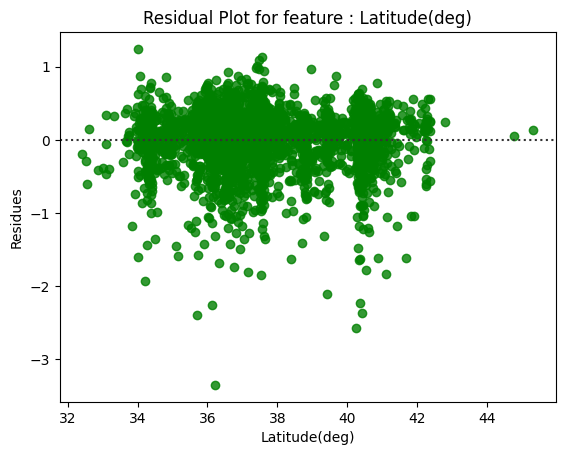

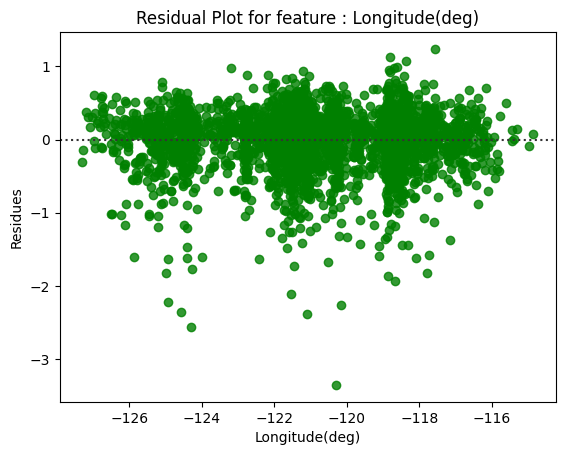

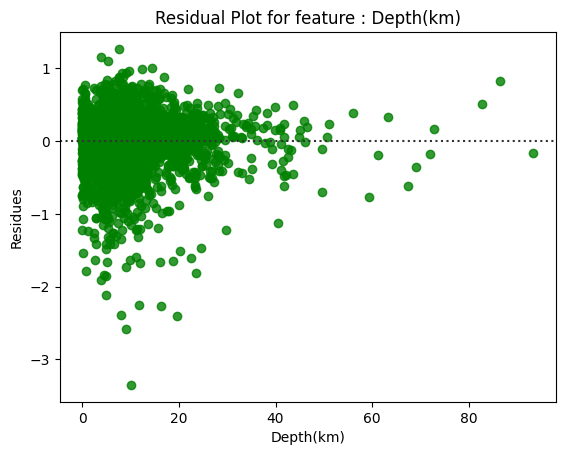

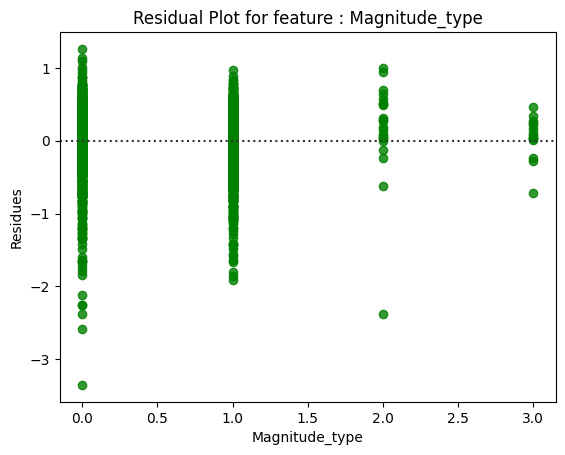

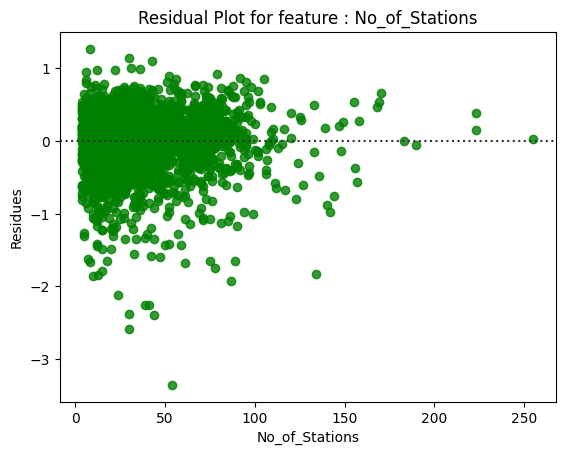

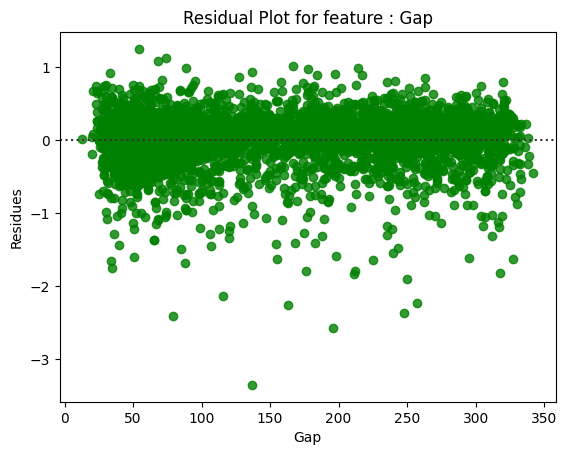

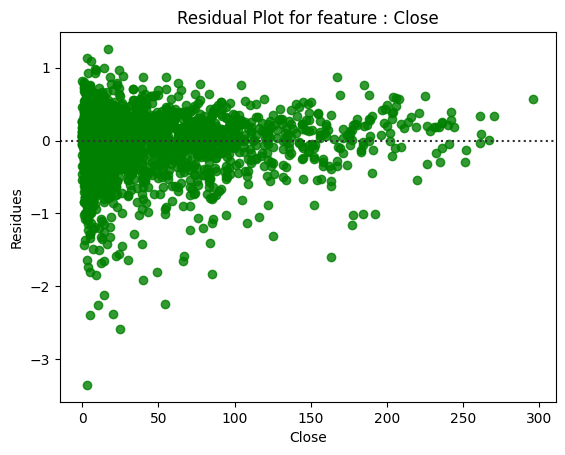

In [15]:
# Residual plot for each feature to understand the correlation of each feature with the tarrget variable 

for i in xtrain.columns:
    plt.figure()
    sns.residplot(x= xtest[i], y =ypred_3-ytest, color='green')
    plt.xlabel(i)
    plt.ylabel('Residues')
    plt.title('Residual Plot for feature : '+i)
    plt.show()

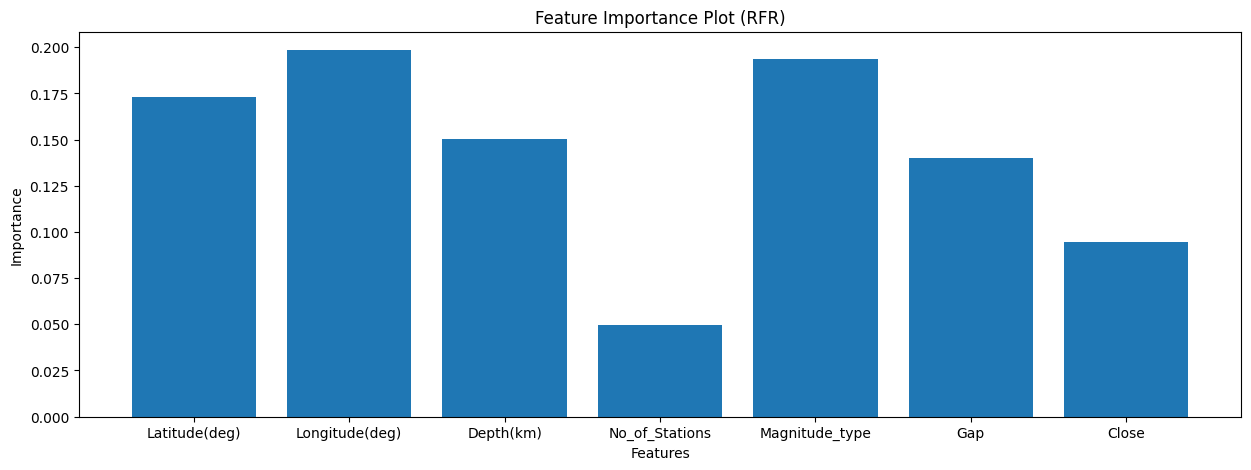

In [16]:
# Feature importance plot for the Random Forest Regressor 

importances = model_3.feature_importances_
features = ['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations', 'Magnitude_type', 'Gap', 'Close']
plt.figure(figsize=(15,5))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot (RFR)')
plt.show()

### **Visualisation**

### **Concluding the accurate model for eathquake prediction**

In [17]:
# The scores data frame

scores = pd.DataFrame(scores)
scores 

,Model name,MSE,RMSE,R2 score
0,Linear regression,0.177406,0.421196,0.078254
1,SVM,0.181780,0.426357,0.055528
2,Random Forest,0.137559,0.370890,0.285286


In [18]:
# Best model with respect to the Mean Squared Error

scores[scores["MSE"] == scores["MSE"].min()]

,Model name,MSE,RMSE,R2 score
2,Random Forest,0.137559,0.37089,0.285286


In [19]:
# Best model with respect to the Root Mean Squared Error

scores[scores["RMSE"] == scores["RMSE"].min()]

,Model name,MSE,RMSE,R2 score
2,Random Forest,0.137559,0.37089,0.285286


In [20]:
# Best model with respect to the R Squared Error

scores[scores["R2 score"] == scores["R2 score"].max()]

,Model name,MSE,RMSE,R2 score
2,Random Forest,0.137559,0.37089,0.285286


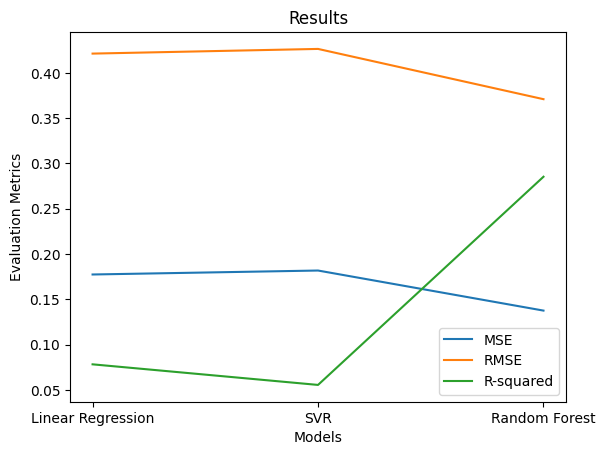

In [21]:
plt.figure()
index = ['Linear Regression', 'SVR', 'Random Forest']
plt.plot(index, scores['MSE'])
plt.plot(index, scores['RMSE'])
plt.plot(index, scores['R2 score'])
plt.legend(['MSE', 'RMSE', 'R-squared'])
plt.xlabel('Models')
plt.ylabel('Evaluation Metrics')
plt.title('Results')
plt.show()

### From the above result we can conclude that Random Forest Regressor is the most accurate model for predicting the magnitude of Earthquake compared to all other models used in this project.